In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Load two images
WIDTH, HEIGHT = 800, 500
dim = (WIDTH, HEIGHT)
img1 = cv2.resize(cv2.imread('./image/img1.jpg'), dim, interpolation = cv2.INTER_AREA) 
logo = cv2.imread("./image/pythonLogo.jpg")
img1.shape, logo.shape

((500, 800, 3), (284, 264, 3))

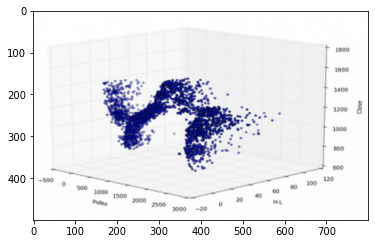

In [59]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cmap='gray')

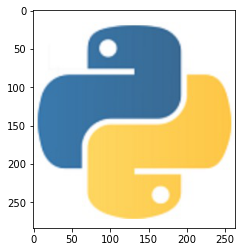

In [60]:
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB), cmap='gray')

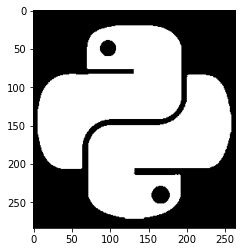

In [61]:
# Now create a mask of logo and create its inverse mask
logo2gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

# add a threshold
ret, mask = cv2.threshold(logo2gray, 220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask, cmap='gray')

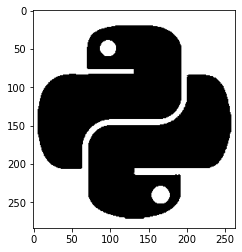

In [62]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

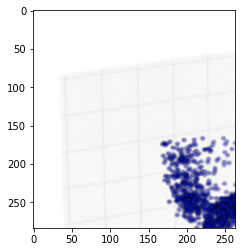

In [63]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = logo.shape
roi = img1[0:rows, 0:cols ]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB), cmap='gray')

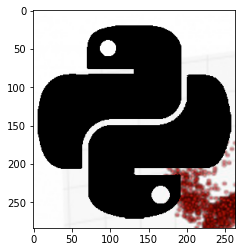

In [64]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg, cmap='gray')

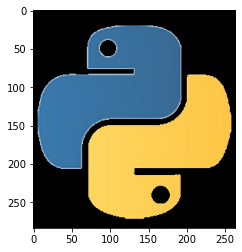

In [65]:
logo_fg = cv2.bitwise_and(logo, logo, mask=mask)
plt.imshow(cv2.cvtColor(logo_fg, cv2.COLOR_BGR2RGB), cmap='gray')

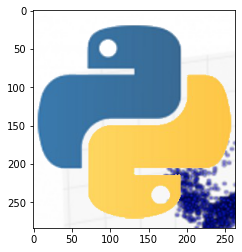

In [66]:
dst = cv2.add(img1_bg, logo_fg)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), cmap='gray')

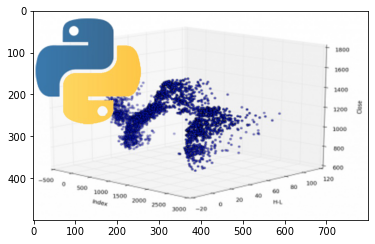

In [67]:
img1[0:rows, 0:cols] = dst
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cmap='gray')